In [2]:
from gensim.models import LdaMulticore
from helper_data import *
from helper_preprocess import *


%load_ext autoreload
%autoreload 2

## Load the data

In [3]:
# Load data
walks_folder = 'data/P3'
walk_path = 'all_p3'
#data = load_all_walks_comments(walks_folder, True)
data = load_all_walks_tags(walks_folder, True)

In [4]:
# Drop the videos where nan occurs
data = data.dropna(subset='keywords')
tags = data['keywords'].tolist()

In [5]:
tags

['choreography  hiphop',
 'ed sheeran  Shape of you  hip hop  choreography  castle on a hill  shape of you ed  shape of you ed sheeran  shape of you lyrics  shape of you dance  perfect ed sheeran " hearts dont break around here"  ed sheeran new album',
 ' momoland comeback  momoland new song  momoland bboom bboom  momoland boom boom  momoland boom  momoland meme  momoland rap  momoland new release  momoland album',
 ' choreography',
 'New',
 ' world cup song  This Time for Africa  FIFA World Cup Song  Addicted to You  whenever wherever  super bowl  super bowl halftime  halftime show  JLO halftime',
 ' sexiest women  try not to sing  oh baby when you talk like that shakira  power hour " hips dont lie shakira lyrics"  4th of July songs " 2000s hits"  Wyclef Jean',
 ' las ketchup asereje video oficial  the ketchup song',
 'a little bit of  acoustic  official  official video  cover',
 ' acoustic  fighter  xtina official  official  Xtina candyman live  lyrics  cover  what a girl wants  back

## Preprocessing

In [6]:
# Preprocess the data
tags_prep = [preprocess(t, tag=True) for t in tags]

In [7]:
tags_prep

[['choreography', 'hiphop'],
 ['ed',
  'sheeran',
  'shape',
  'hip',
  'hop',
  'choreography',
  'castle',
  'hill',
  'shape',
  'ed',
  'shape',
  'ed',
  'sheeran',
  'shape',
  'lyric',
  'shape',
  'dance',
  'perfect',
  'ed',
  'sheeran',
  'heart',
  'dont',
  'break',
  'around',
  'ed',
  'sheeran',
  'new',
  'album'],
 ['momoland',
  'comeback',
  'momoland',
  'new',
  'song',
  'momoland',
  'bboom',
  'bboom',
  'momoland',
  'boom',
  'boom',
  'momoland',
  'boom',
  'momoland',
  'meme',
  'momoland',
  'rap',
  'momoland',
  'new',
  'release',
  'momoland',
  'album'],
 ['choreography'],
 ['new'],
 ['world',
  'cup',
  'song',
  'time',
  'africa',
  'fifa',
  'world',
  'cup',
  'song',
  'addicted',
  'whenever',
  'wherever',
  'super',
  'bowl',
  'super',
  'bowl',
  'halftime',
  'halftime',
  'show',
  'jlo',
  'halftime'],
 ['sexiest',
  'woman',
  'try',
  'sing',
  'oh',
  'baby',
  'talk',
  'like',
  'shakira',
  'power',
  'hour',
  'hip',
  'dont',
 

In [8]:
len(tags_prep)

490

In [9]:
# Filter out words that appear in more than 30% of the videos and words that
# appear less than 3 times
min_words = 3
max_freq = 0.3

dictionary, corpus = create_corpus(tags_prep, min_words, max_freq)

## LDA

In [18]:
# LDA parameters
workers = 3
passes = 1000
random_state = 123
num_topics = 12
alpha = 0.05 # < 1 gives sparse topics distributions
eta = 0.05 # < 1 gives sparse words distribution inside each topic

lda_model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=workers, passes=passes, random_state=random_state, alpha=alpha, eta=eta)

In [19]:
lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=10)

[(0,
  [('minecraft', 0.47332233),
   ('cover', 0.0621183),
   ('hardcore', 0.045215685),
   ('day', 0.036764078),
   ('ice', 0.036763903),
   ('water', 0.033946946),
   ('acoustic', 0.025094017),
   ('survival', 0.01986074),
   ('playlist', 0.018575955),
   ('tear', 0.017043663)]),
 (1,
  [('make', 0.0655996),
   ('stove', 0.052697085),
   ('wood', 0.050190892),
   ('restoration', 0.04055952),
   ('cooking', 0.040380407),
   ('hack', 0.03970218),
   ('build', 0.036513537),
   ('idea', 0.03635847),
   ('food', 0.03214088),
   ('home', 0.031303577)]),
 (2,
  [('free', 0.20863043),
   ('phone', 0.12879121),
   ('camera', 0.12593235),
   ('gas', 0.06589645),
   ('vevo', 0.040166568),
   ('cole', 0.03444903),
   ('official', 0.026792767),
   ('keyshia', 0.025872469),
   ('new', 0.02112037),
   ('garbage', 0.017295912)]),
 (3,
  [('bottle', 0.106688656),
   ('flip', 0.10527598),
   ('perfect', 0.089030795),
   ('dude', 0.089030795),
   ('shot', 0.07066661),
   ('trick', 0.06818364),
   ('fa

Tests made :
passes=10 for below
- alpha=0.5, eta=1, num_topics=10 :
    - Individual topics easily interpretable, but some are a bit mixed -> decrease alpha and maybe eta too, to get more polarized topics in each video and more specific vocabulary in each topic
    - Multiple topics about the same subject : especially music -> reduce number of topics
- alpha=0.2, eta=1, num_topics=10 :
    - More polarized topics as wanted
    - Still some mixed topics
    - Still multiple topics about the same subjects (especially music again)
- alpha=0.2, eta=1, num_topics=7 :
    - Fewer similar topics, but kind of more mixed words in each topic
- alpha=0.2, eta=0.8, num_topics=7 :
    - Still approx. 2 topics on music -> reduce num_topics
- alpha=0.2, eta=0.8, num_topics=6 :
    - More or less distinct topics
    - First 4 are easily interpretable but last 2 are more mixed (music-minecraft)
- alpha=0.2, eta=0.8, num_topics=5 :
    - Even more mixed up topics -> need more than 5 topics to fit well


passes=50 for below (training time is still very short)
- alpha=0.1, eta=0.7, num_topics=7 :
    - Still a bit mixed up topics in the last 2 -> might actually need to increase num_topics but set sharper alpha and eta
- alpha=0.1, eta=0.1, num_topics=8 :
    - Again the first few topics are very good but the last ones are more mixed up

Observation : might want to remove the word "official", appears often in the topics (e.g. for music, etc) but not really informative about the subject

passes=100 for below (training time is still very short)
- alpha=0.1, eta=0.1, num_topics=8 :
    - Similar to passes=50
- alpha=50/num_topics (typical value used in practice), eta=0.1, num_topics=8 :
    - Quite good topics but somewhat mixed -> try to lower the 50
- alpha=25/num_topics, eta=0.1, num_topics=8 :
    - Quite good topics
- alpha=25/num_topics, eta=0.1, num_topics=7 :
    - Quite good topics but a bit more mixed -> keep num_topics=8
- alpha=1, eta=0.1, num_topics=8 :
    - Quite good topics but got two music topics
- alpha=25/num_topics, eta=0.01, num_topics=8 :
    - Topics very similar to previous setup
    - Again 2 topics on music
- alpha=10/num_topics, eta=0.01, num_topics=8 :
    - Again very similar to previous setup
    - And again 2 topics on music
- alpha=0.99, eta=0.1, num_topics=15 :
    - Not so bad : many similar topics but more interpretable (less mixed)


In the end -> have to tune with final data

## Clustering the videos

In [21]:
# Build the "embeddings" for each document using its topics distribution
embeddings = np.zeros((len(corpus), num_topics))
for i, doc_bow in enumerate(corpus):
    topics_distr = lda_model.get_document_topics(doc_bow)
    embedding = [0.0] * num_topics

    for id, p in topics_distr:
        embedding[id] = p

    embeddings[i, :] = embedding

In [26]:
from sklearn.manifold import TSNE

# Init pca is more stable,
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=random_state)
corpus_emb = tsne.fit_transform(embeddings)

/home/cpittet/anaconda3/envs/shs/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


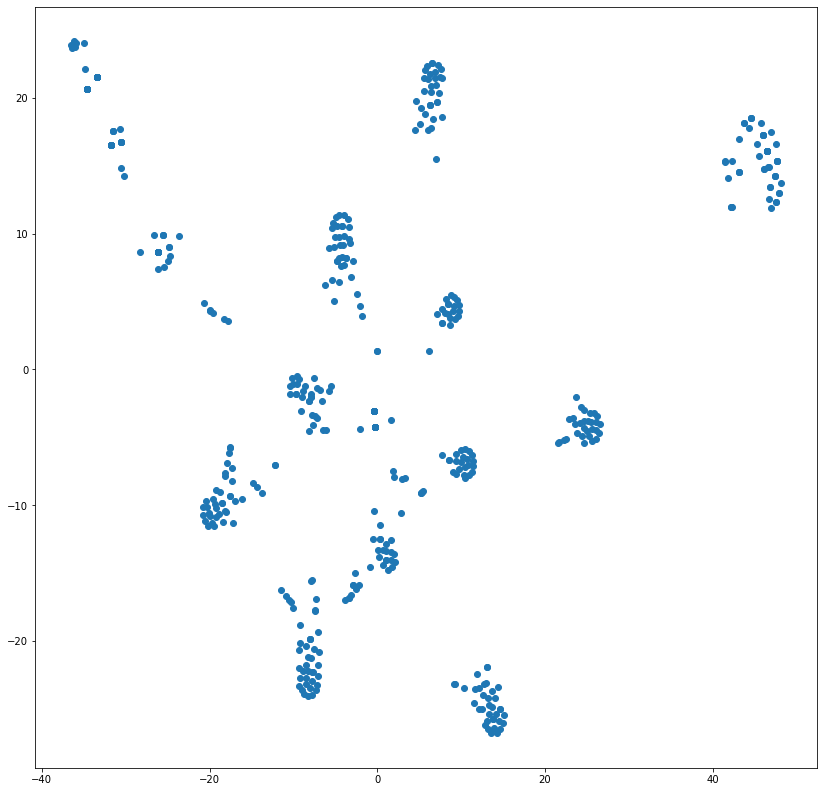

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,14)

plt.scatter(corpus_emb[:, 0], corpus_emb[:, 1])
plt.show()

- Need to separate runs
- Color scale to indicate the time

In [28]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool, ResetTool, PanTool, WheelZoomTool, SaveTool
output_notebook()

from matplotlib.colors import rgb2hex
cmap = plt.get_cmap('viridis')
def val2rgb(val):
    return rgb2hex(cmap(val)[:3])

Loading BokehJS ...

In [32]:
xs, ys = corpus_emb[:, 0], corpus_emb[:, 1]
best_topic_ids = [np.argmax(row) for row in embeddings.tolist()]

# We will need to separate runs, here we have all runs of P3
colors = [val2rgb(i) for i in range(len(xs))]

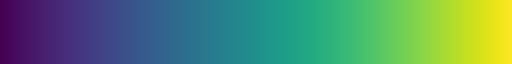

In [34]:
cmap

In [33]:
source = ColumnDataSource(
    data={"x": xs, "y": ys, "topic": best_topic_ids, "color": colors})

hover = HoverTool(
    tooltips=[
        ("Best topic", "@topic"),
    ])
tools = [hover, ResetTool(), PanTool(), WheelZoomTool(), SaveTool()]

p = figure(plot_width=960, plot_height=720, tools=tools, title="Mouse over the dots")
p.circle("x", "y", source=source, size=20, color="color", alpha=0.5)
show(p, notebook_handle=True)